# Housing Market Data Analysis

## 1. Work with Python Libraries 

In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

## 2. Look, clean and join datasets 

In [4]:
# Import datasets
df_campolide_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/campolide.csv")
df_lumiar_houses_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lumiar_house_params.csv")
df_lumiar_ads_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lumiar_title_link.csv")
df_benfica_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sao-domingos-de-benfica.csv")

Testing different methods to understand the structure of the dataset:

In [5]:
df_campolide_raw.columns

Index(['idealista_id', 'typology', 'area_in_m2', 'floor', 'region_parish',
       'price_in_euros', 'seller contact', 'link_idealista',
       'idealista_ad_title'],
      dtype='object')

In [6]:
df_lumiar_houses_raw.dtypes

id                 int64
typology          object
area               int64
floor             object
location          object
price              int64
seller contact    object
dtype: object

In [7]:
df_lumiar_ads_raw.shape

(512, 3)

In [8]:
df_lumiar_houses_raw.head(2)

,id,typology,area,floor,location,price,seller contact
0,30857595,T3,545,NaN,lumiar,1669489,215561507
1,30857604,T3,500,NaN,lumiar,1619801,215561507


### 2.1. Renaming columns
Goal: id, typology, area_in_m2, floor, region_parish, price_in_euros, seller_contact, link_idealista, idealista_ad_title

In [9]:
df_campolide = df_campolide_raw.rename(columns={'idealista_id': 'id',
                                                'seller contact': 'seller_contact'})

In [10]:
df_lumiar_houses = df_lumiar_houses_raw.rename(columns={'area': 'area_in_m2',
                                                        'location': 'region_parish',
                                                        'price': 'price_in_euros',
                                                        'seller contact': 'seller_contact'})

In [11]:
df_lumiar_ads = df_lumiar_ads_raw.rename(columns={'link': 'link_idealista',
                                                  'title': 'idealista_ad_title'})

In [12]:
df_benfica = df_benfica_raw.rename(columns={'area': 'area_in_m2',
                                                'price': 'price_in_euros',
                                                'seller contact': 'seller_contact',
                                                'link': 'link_idealista',
                                                'title': 'idealista_ad_title'})

### 2.2. Add missing columns
São Domingos de Benfica is missing the region_parish field, which should be sao-domingos-de-benfica

In [13]:
df_benfica['region_parish'] = 'sao-domingos-benfica'
df_benfica.head(2)

,id,typology,area_in_m2,floor,price_in_euros,seller_contact,link_idealista,idealista_ad_title,region_parish
0,31508143,T1,82,3º andar,330000,925105141.0,https://www.idealista.pt/imovel/31508143/,"Apartamento T1 na rua Manuel da Fonseca, 4, La...",sao-domingos-benfica
1,31509096,T3,130,NaN,450000,215552741.0,https://www.idealista.pt/imovel/31509096/,"Apartamento T3 em Laranjeiras, São Domingos de...",sao-domingos-benfica


### 2.3. Check for nulls
And... do what with them?

In [14]:
df_campolide.isnull().sum()

id                      0
typology                0
area_in_m2              0
floor                 114
region_parish           0
price_in_euros          0
seller_contact          4
link_idealista          0
idealista_ad_title      0
dtype: int64

In [15]:
df_lumiar_houses.isnull().sum()

id                  0
typology            0
area_in_m2          0
floor             112
region_parish       0
price_in_euros      0
seller_contact      9
dtype: int64

In [16]:
df_lumiar_ads.isnull().sum()

id                    0
link_idealista        0
idealista_ad_title    0
dtype: int64

In [17]:
df_benfica.isnull().sum()

id                      0
typology                0
area_in_m2              0
floor                 107
price_in_euros          0
seller_contact          6
link_idealista          0
idealista_ad_title      0
region_parish           0
dtype: int64

The absence of floor number doesn't seem super relevant to me. Not sure if i should treat it in any way?
Although seller_contact is a number, it's not a number per se, in the sense that I won't be performing mathematical operations on them. So once again, not sure if I should treat them in any way.

### 2.4. Look for and eliminate duplicates

In [18]:
df_campolide.duplicated('id').sum()

13

In [19]:
df_campolide = df_campolide.drop_duplicates('id')

In [20]:
df_lumiar_houses.duplicated('id').sum()

0

In [21]:
df_lumiar_ads.duplicated('id').sum()

0

In [22]:
df_benfica.duplicated('id').sum()

0

### 2.5. Merge complementary datasets

In [23]:
df_lumiar = pd.merge(df_lumiar_houses, df_lumiar_ads, how="inner", on='id', validate='one_to_one')
df_lumiar.head(5)

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title
0,30857595,T3,545,NaN,lumiar,1669489,215561507,https://www.idealista.pt/imovel/30857595/,"Moradia em Paço do Lumiar, Lumiar"
1,30857604,T3,500,NaN,lumiar,1619801,215561507,https://www.idealista.pt/imovel/30857604/,"Moradia em Paço do Lumiar, Lumiar"
2,31508307,T3,190,2º andar,lumiar,648000,215563197,https://www.idealista.pt/imovel/31508307/,"Apartamento T3 na rua Professor Simões Raposo,..."
3,31492088,T2,111,3º andar,lumiar,335000,215550925,https://www.idealista.pt/imovel/31492088/,Apartamento T2 em Alto do Lumiar - Quinta das ...
4,31492087,T2,125,7º andar,lumiar,400000,215550925,https://www.idealista.pt/imovel/31492087/,Apartamento T2 em Alto do Lumiar - Quinta das ...


### 2.6. Concatenate all the datasets

In [98]:
df_houses = pd.concat([df_campolide, df_lumiar, df_benfica])
df_houses

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title
0,31508669,T2,101,,campolide,520000,210062154.0,https://www.idealista.pt/imovel/31508669/,"Apartamento T2 em Centro - Nova Campolide, Cam..."
1,30319965,T3,160,7º andar,campolide,1370000,215553642.0,https://www.idealista.pt/imovel/30319965/,"Apartamento T3 em Centro - Nova Campolide, Cam..."
2,29897687,T2,92,1º andar,campolide,700000,215553642.0,https://www.idealista.pt/imovel/29897687/,"Apartamento T2 em Centro - Nova Campolide, Cam..."
3,29893223,T2,92,1º andar,campolide,700000,215553642.0,https://www.idealista.pt/imovel/29893223/,"Apartamento T2 em Centro - Nova Campolide, Cam..."
4,29897703,T2,97,5º andar,campolide,780000,215553642.0,https://www.idealista.pt/imovel/29897703/,"Apartamento T2 em Centro - Nova Campolide, Cam..."
...,...,...,...,...,...,...,...,...,...
423,29517697,T6,197,NaN,sao-domingos-benfica,680000,215561712.0,https://www.idealista.pt/imovel/29517697/,"Apartamento T6 em Estrada de Benfica, São Domi..."
424,29509972,T2,88,5º andar,sao-domingos-benfica,330000,215550638.0,https://www.idealista.pt/imovel/29509972/,"Apartamento T2 na estrada soeiros, Alto dos Mo..."
425,29099794,T4,226,,sao-domingos-benfica,750000,289987045.0,https://www.idealista.pt/imovel/29099794/,"Apartamento T4 em Alto dos Moinhos, São Doming..."
426,28988900,T1,69,NaN,sao-domingos-benfica,320000,215552854.0,https://www.idealista.pt/imovel/28988900/,"Apartamento T1 na estrada da Luz, s/n, Alto do..."


## 3. Prepare your dataset

### 3.1. Create a column of price per square meter using series operations

In [99]:
df_houses['price_per_m2'] = df_houses['price_in_euros'] / df_houses['area_in_m2']
df_houses.head(2)

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2
0,31508669,T2,101,,campolide,520000,210062154.0,https://www.idealista.pt/imovel/31508669/,"Apartamento T2 em Centro - Nova Campolide, Cam...",5148.514851
1,30319965,T3,160,7º andar,campolide,1370000,215553642.0,https://www.idealista.pt/imovel/30319965/,"Apartamento T3 em Centro - Nova Campolide, Cam...",8562.500000


### 3.2. Extract the house type - “apartamento”, “moradia”, etc. - from the “title” column

In [100]:
df_houses['idealista_ad_title'].str.partition()[0].str.strip(',').unique()

array(['Apartamento', 'Moradia', 'Duplex', 'Penthouse', 'Palácio',
       'Herdade', 'Andar'], dtype=object)

In [101]:
df_houses['house_type'] = df_houses['idealista_ad_title'].str.partition()[0].str.strip(',')
df_houses.head(2)

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type
0,31508669,T2,101,,campolide,520000,210062154.0,https://www.idealista.pt/imovel/31508669/,"Apartamento T2 em Centro - Nova Campolide, Cam...",5148.514851,Apartamento
1,30319965,T3,160,7º andar,campolide,1370000,215553642.0,https://www.idealista.pt/imovel/30319965/,"Apartamento T3 em Centro - Nova Campolide, Cam...",8562.500000,Apartamento


In [102]:
df_houses['house_type'].unique()

array(['Apartamento', 'Moradia', 'Duplex', 'Penthouse', 'Palácio',
       'Herdade', 'Andar'], dtype=object)

### 3.3. Extract the sub_region data from the title column

In [103]:
def get_subparish_from_title(title):
  sub_parish = title.rpartition(',')[0].rpartition(',')[2].strip()
  if ' na ' in sub_parish:
    return sub_parish.rpartition(' na ')[2]
  if ' em ' in sub_parish:
    return sub_parish.rpartition(' em ')[2]
  return sub_parish
df_houses['idealista_ad_title'].apply(get_subparish_from_title).unique()


array(['Centro - Nova Campolide',
       'Bairro da Serafina - Bairro da Liberdade',
       'Praça de Espanha - Sete Rios', 'Bairro Calçada dos Mestres',
       'Paço do Lumiar', 'Telheiras',
       'Alto do Lumiar - Quinta das Conchas - Quinta do Lambert',
       'Carriche - Hospital das Forças Armadas', 'Centro',
       'Quinta dos Alcoutins', 'Laranjeiras', 'Alto dos Moinhos',
       'Estrada de Benfica', 'Sete Rios'], dtype=object)

In [104]:
df_houses['sub_parish'] = df_houses['idealista_ad_title'].apply(get_subparish_from_title)
df_houses.head(2)

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type,sub_parish
0,31508669,T2,101,,campolide,520000,210062154.0,https://www.idealista.pt/imovel/31508669/,"Apartamento T2 em Centro - Nova Campolide, Cam...",5148.514851,Apartamento,Centro - Nova Campolide
1,30319965,T3,160,7º andar,campolide,1370000,215553642.0,https://www.idealista.pt/imovel/30319965/,"Apartamento T3 em Centro - Nova Campolide, Cam...",8562.500000,Apartamento,Centro - Nova Campolide


In [105]:
df_houses['sub_parish'].unique()

array(['Centro - Nova Campolide',
       'Bairro da Serafina - Bairro da Liberdade',
       'Praça de Espanha - Sete Rios', 'Bairro Calçada dos Mestres',
       'Paço do Lumiar', 'Telheiras',
       'Alto do Lumiar - Quinta das Conchas - Quinta do Lambert',
       'Carriche - Hospital das Forças Armadas', 'Centro',
       'Quinta dos Alcoutins', 'Laranjeiras', 'Alto dos Moinhos',
       'Estrada de Benfica', 'Sete Rios'], dtype=object)

### 3.4. Transform the floor column to take only the floor number

In [106]:
df_houses['floor'].unique()

array([' ', '7º andar ', '1º andar ', '5º andar ', '2º andar ',
       '3º andar ', '4º andar ', '6º andar ', nan, '9º andar ',
       '16º andar ', 'Rés do chão ', '10º andar ', '15º andar ',
       '8º andar ', '17º andar ', '21º andar ', '11º andar ',
       '19º andar ', '22º andar ', '14º andar ', 'Entreplanta ', 'Cave ',
       '13º andar ', '12º andar ', 'Andar -1 ', 'Sub cave '], dtype=object)

In [107]:
def get_floor_nb(floor):
  # if pd.isna(floor) or floor.strip() == "Entreplanta": return None
  if floor.strip() == "Rés do chão": return 0
  if "cave" in floor.lower(): return -1
  nb_floor = "".join(list(filter(lambda x: x.isdigit() or x == '-', floor)))
  if any(x.isdigit() for x in nb_floor): return int(nb_floor)
  return None

floors = [' ', '7º andar ', '1º andar ', '5º andar ', '2º andar ',
          '3º andar ', '4º andar ', '6º andar ', '9º andar ',
          '16º andar ', 'Rés do chão ', '10º andar ', '15º andar ',
          '8º andar ', '17º andar ', '21º andar ', '11º andar ',
          '19º andar ', '22º andar ', '14º andar ', 'Entreplanta ', 'Cave ',
          '13º andar ', '12º andar ', 'Andar -1 ', 'Sub cave ']
for floor in floors:
  get_floor_nb(floor)

In [108]:
df_houses['floor'] = df_houses['floor'].map(get_floor_nb, na_action="ignore")
df_houses['floor'].unique()

array([nan,  7.,  1.,  5.,  2.,  3.,  4.,  6.,  9., 16.,  0., 10., 15.,
        8., 17., 21., 11., 19., 22., 14., -1., 13., 12.])

## 3.5. Extract the number of bedrooms from the typology column

In [109]:
df_houses['typology'].unique()

array(['T2 ', 'T3 ', 'T1 ', 'T0 ', 'T4 ', 'T5 ', 'T7 ', 'T6 ', 'T9 ',
       'T8 ', 'T10 '], dtype=object)

In [110]:
df_houses['typology'].str[1].astype(int)

0      2
1      3
2      2
3      2
4      2
      ..
423    6
424    2
425    4
426    1
427    5
Name: typology, Length: 1459, dtype: int64

In [111]:
df_houses['nb_rooms'] = df_houses['typology'].str[1].astype(int)
df_houses.head(5)

,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type,sub_parish,nb_rooms
0,31508669,T2,101,NaN,campolide,520000,210062154.0,https://www.idealista.pt/imovel/31508669/,"Apartamento T2 em Centro - Nova Campolide, Cam...",5148.514851,Apartamento,Centro - Nova Campolide,2
1,30319965,T3,160,7.0,campolide,1370000,215553642.0,https://www.idealista.pt/imovel/30319965/,"Apartamento T3 em Centro - Nova Campolide, Cam...",8562.500000,Apartamento,Centro - Nova Campolide,3
2,29897687,T2,92,1.0,campolide,700000,215553642.0,https://www.idealista.pt/imovel/29897687/,"Apartamento T2 em Centro - Nova Campolide, Cam...",7608.695652,Apartamento,Centro - Nova Campolide,2
3,29893223,T2,92,1.0,campolide,700000,215553642.0,https://www.idealista.pt/imovel/29893223/,"Apartamento T2 em Centro - Nova Campolide, Cam...",7608.695652,Apartamento,Centro - Nova Campolide,2
4,29897703,T2,97,5.0,campolide,780000,215553642.0,https://www.idealista.pt/imovel/29897703/,"Apartamento T2 em Centro - Nova Campolide, Cam...",8041.237113,Apartamento,Centro - Nova Campolide,2


## 4. Perform a data analysis with visualizations

### 4.1. Group data by subregion to calculate its average price per square meter

In [118]:
df_subparishes = df_houses.groupby('sub_parish').mean()
df_subparishes[['price_per_m2']]

,price_per_m2
sub_parish,
Alto do Lumiar - Quinta das Conchas - Quinta do Lambert,3373.664651
Alto dos Moinhos,4674.528764
Bairro Calçada dos Mestres,3856.997267
Bairro da Serafina - Bairro da Liberdade,2921.143299
Carriche - Hospital das Forças Armadas,3242.661619
Centro,3758.871321
Centro - Nova Campolide,6272.029879
Estrada de Benfica,4032.888603
Laranjeiras,4270.963880


### 4.2. Use agg method to extract multiple metrics (like min, max, median, 75% and 25% percentile) for the price per square meter

In [133]:
# https://pbpython.com/groupby-agg.html
# https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function

# return percentile_ is returning a pointer to a function, not a value
# then this function is called inside agg
def percentile(q):
    def percentile_(x):
        return x.quantile(q)
    percentile_.__name__ = 'percentile_%s' % q
    return percentile_

# another option would be to have inside agg -> lambda x: percentile(x, q)
# which would call the following function:
# def percentile(x, q):
#    return x.quantile(q)
# sadly I can only have access to x (the row) with an anonymous function or the wrapper

df_subparishes['price_per_m2'].agg(['min', 'max', 'median', percentile(0.25), percentile(0.75)])

min                2921.143299
max                6272.029879
median             4091.883686
percentile_0.25    3783.402807
percentile_0.75    4636.283677
Name: price_per_m2, dtype: float64

### 4.3. Analyze the distribution of price per square meter by region and sub-region using a boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x7f5edbd65150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5edbd6a210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5edbd74250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5edbd6acd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5edbd65750>,
  <matplotlib.lines.Line2D at 0x7f5edbd65c90>]}

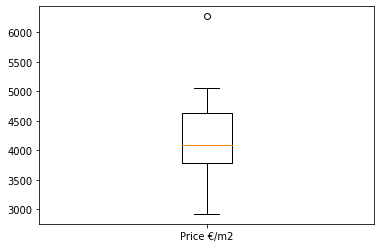

In [137]:
plt.boxplot(df_subparishes['price_per_m2'], labels=["Price €/m2"])

In [139]:
df_parishes = df_houses.groupby('region_parish').mean()
df_parishes[['price_per_m2']]

,price_per_m2
region_parish,
campolide,5808.701686
lumiar,3687.817073
sao-domingos-benfica,4340.916372


{'boxes': [<matplotlib.lines.Line2D at 0x7f5edbce08d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5edbce3990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5edbcea9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5edbcea490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5edbce0ed0>,
  <matplotlib.lines.Line2D at 0x7f5edbce3450>]}

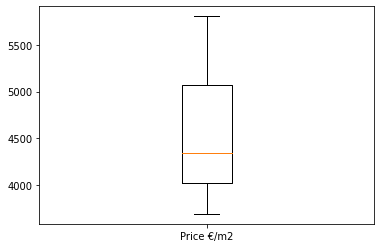

In [140]:
plt.boxplot(df_parishes['price_per_m2'], labels=["Price €/m2"])

In [141]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

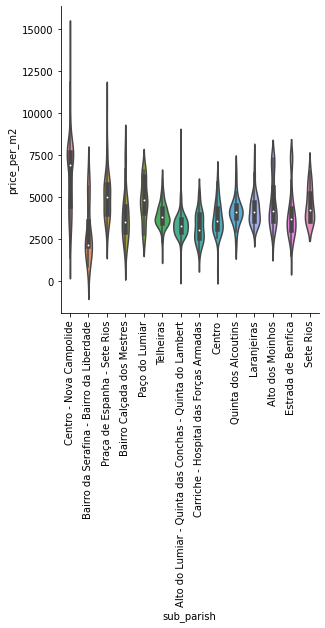

In [144]:
sns.catplot(data=df_houses, x='sub_parish', y='price_per_m2', kind='violin')
plt.xticks(rotation=90)

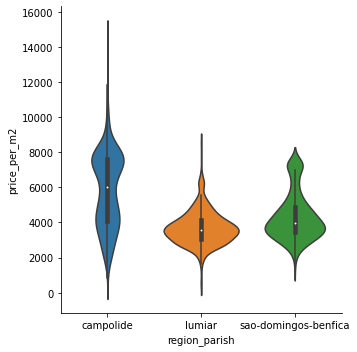

In [146]:
sns.catplot(data=df_houses, x='region_parish', y='price_per_m2', kind='violin')

## 5. Export final data to excel

Investors guidelines:
- analyze the price per square meter, per sub-region, and to include visualizations (but feel free to go deeper and give your own spice to the analysis).
- preferences: apartments or duplex T0, T1 or T2, with a maximum price of 500.000€, a price per square meter below the sub-region average, above the ground floor (1st floor or higher)
- sorted in ascending order according to the ratio between the house price per square meter and its sub-region average price per square meter

In [175]:
# sub_parish = 'Alto dos Moinhos'
# df_subparishes['price_per_m2'][sub_parish] # worked until here

In [176]:
# df_houses['subparishes_avg_price'] = df_subparishes['price_per_m2'][df_houses['sub_parish']]
# df_houses.head(5)
# but this gave an error: cannot reindex from a duplicate axis
# so I tried something else, although I think the solution below is a bit of an overkill

In [156]:
df_subparishes_avg_price = df_subparishes[['price_per_m2']]
df_subparishes_avg_price = df_subparishes_avg_price.rename(columns={'price_per_m2': 'subparish_avg_price'})
df_subparishes_avg_price.head(5)

,subparish_avg_price
sub_parish,
Alto do Lumiar - Quinta das Conchas - Quinta do Lambert,3373.664651
Alto dos Moinhos,4674.528764
Bairro Calçada dos Mestres,3856.997267
Bairro da Serafina - Bairro da Liberdade,2921.143299
Carriche - Hospital das Forças Armadas,3242.661619


In [159]:
df_housesx = pd.merge(df_subparishes_avg_price, df_houses, how="inner", on='sub_parish', validate='one_to_many')

In [177]:
df_housesx['price_ratio'] = df_housesx['price_per_m2'] / df_housesx['subparish_avg_price']
df_housesx.head(5)

,sub_parish,subparish_avg_price,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type,nb_rooms,price_ratio
0,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492088,T2,111,3.0,lumiar,335000,215550925,https://www.idealista.pt/imovel/31492088/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3018.018018,Apartamento,2,0.894582
1,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492087,T2,125,7.0,lumiar,400000,215550925,https://www.idealista.pt/imovel/31492087/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3200.000000,Apartamento,2,0.948523
2,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492090,T2,111,5.0,lumiar,345000,215550925,https://www.idealista.pt/imovel/31492090/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3108.108108,Apartamento,2,0.921285
3,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492089,T2,111,5.0,lumiar,345000,215550925,https://www.idealista.pt/imovel/31492089/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3108.108108,Apartamento,2,0.921285
4,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492086,T1,81,-1.0,lumiar,220000,215550925,https://www.idealista.pt/imovel/31492086/,Apartamento T1 em Alto do Lumiar - Quinta das ...,2716.049383,Apartamento,1,0.805074


In [194]:
# preferences:
# apartments or duplex
# T0, T1 or T2
# with a maximum price of 500.000€
# a price per square meter below the sub-region average
# above the ground floor (1st floor or higher)

df_results = df_housesx[(((df_housesx['house_type'] == 'Apartamento') | (df_housesx['house_type'] == 'Duplex')) &
                        (df_housesx['nb_rooms'] <= 2) &
                        (df_housesx['price_in_euros'] <= 500000) &
                        (df_housesx['price_ratio'] < 1) &
                        (df_housesx['floor'] >= 1))]
df_results.head(5)

,sub_parish,subparish_avg_price,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type,nb_rooms,price_ratio
0,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492088,T2,111,3.0,lumiar,335000,215550925,https://www.idealista.pt/imovel/31492088/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3018.018018,Apartamento,2,0.894582
1,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492087,T2,125,7.0,lumiar,400000,215550925,https://www.idealista.pt/imovel/31492087/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3200.000000,Apartamento,2,0.948523
2,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492090,T2,111,5.0,lumiar,345000,215550925,https://www.idealista.pt/imovel/31492090/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3108.108108,Apartamento,2,0.921285
3,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31492089,T2,111,5.0,lumiar,345000,215550925,https://www.idealista.pt/imovel/31492089/,Apartamento T2 em Alto do Lumiar - Quinta das ...,3108.108108,Apartamento,2,0.921285
30,Alto do Lumiar - Quinta das Conchas - Quinta d...,3373.664651,31327236,T1,79,2.0,lumiar,250000,215552851,https://www.idealista.pt/imovel/31327236/,Apartamento T1 na avenida David Mourão-Ferreir...,3164.556962,Apartamento,1,0.938018


In [196]:
df_results.sort_values(by="price_ratio", ascending=True).head(5)

,sub_parish,subparish_avg_price,id,typology,area_in_m2,floor,region_parish,price_in_euros,seller_contact,link_idealista,idealista_ad_title,price_per_m2,house_type,nb_rooms,price_ratio
860,Centro - Nova Campolide,6272.029879,30678844,T1,63,1.0,campolide,115000,215568914.0,https://www.idealista.pt/imovel/30678844/,"Apartamento T1 na rua Conde Antas, 66, Centro ...",1825.396825,Apartamento,1,0.291038
861,Centro - Nova Campolide,6272.029879,30613146,T1,60,2.0,campolide,175000,215552859.0,https://www.idealista.pt/imovel/30613146/,"Apartamento T1 na rua Arco do Carvalhão, s/n, ...",2916.666667,Apartamento,1,0.465028
745,Centro - Nova Campolide,6272.029879,31293805,T2,69,2.0,campolide,209000,215555738.0,https://www.idealista.pt/imovel/31293805/,"Apartamento T2 em Centro - Nova Campolide, Cam...",3028.985507,Apartamento,2,0.482935
684,Centro - Nova Campolide,6272.029879,31464728,T2,105,3.0,campolide,318500,215555267.0,https://www.idealista.pt/imovel/31464728/,"Apartamento T2 na rua General Taborda, 3, Cent...",3033.333333,Apartamento,2,0.483629
797,Centro - Nova Campolide,6272.029879,31083816,T2,105,3.0,campolide,326500,215556715.0,https://www.idealista.pt/imovel/31083816/,"Apartamento T2 em Centro - Nova Campolide, Cam...",3109.523810,Apartamento,2,0.495776
